In [1]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pandas.read_csv("ChronicDisease.csv")

In [3]:
data.head()

,Id,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,2,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,3,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,4,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,5,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,6,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
data.isna().mean()

Id                         0.0000
 Age                       0.0225
Blood Pressure             0.0300
Specific Gravity           0.1175
Albumin                    0.1150
Sugar                      0.1225
Red Blood Cells            0.3800
Pus Cell                   0.1625
Pus Cell clumps            0.0100
Bacteria                   0.0100
Blood Glucose Random       0.1100
Blood Urea                 0.0475
Serum Creatinine           0.0425
Sodium                     0.2175
Potassium                  0.2200
Hemoglobin                 0.1300
Packed Cell Volume         0.1775
White Blood Cell Count     0.2650
Red Blood Cell Count       0.3275
Hypertension               0.0050
Diabetes Mellitus          0.0050
Coronary Artery Disease    0.0050
Appetite                   0.0025
Pedal Edema                0.0025
Anemia                     0.0025
Class                      0.0000
dtype: float64

In [5]:
a=data.isna().mean().tolist()
b=data.columns.tolist()
c=[]
for k in range(len(a)):
    if a[k] >= 0.2 :
        c.append(b[k])
print(c)

['Red Blood Cells', 'Sodium', 'Potassium', 'White Blood Cell Count', 'Red Blood Cell Count']


In [6]:
data2=data.drop(columns=c)
data2


,Id,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Serum Creatinine,Hemoglobin,Packed Cell Volume,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,2,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,1.2,15.4,44.0,yes,yes,no,good,no,no,ckd
1,3,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,0.8,11.3,38.0,no,no,no,good,no,no,ckd
2,4,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,1.8,9.6,31.0,no,yes,no,poor,no,yes,ckd
3,5,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,3.8,11.2,32.0,yes,no,no,poor,yes,yes,ckd
4,6,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,1.4,11.6,35.0,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,397,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,...,0.5,15.7,47.0,no,no,no,good,no,no,notckd
396,398,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,...,1.2,16.5,54.0,no,no,no,good,no,no,notckd
397,399,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,...,0.6,15.8,49.0,no,no,no,good,no,no,notckd
398,400,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,...,1.0,14.2,51.0,no,no,no,good,no,no,notckd


In [7]:
data3=data2.drop(columns='Id')

In [8]:
catego=data3.select_dtypes(include='object').astype('category')



In [9]:
catego=pandas.get_dummies(catego, drop_first=True)

In [10]:
data3=data3.select_dtypes(exclude='object')
data4=data3.join(catego)
data4

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Hemoglobin,Packed Cell Volume,Pus Cell_normal,Pus Cell clumps_present,Bacteria_present,Hypertension_yes,Diabetes Mellitus_yes,Coronary Artery Disease_yes,Appetite_poor,Pedal Edema_yes,Anemia_yes,Class_notckd
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,15.4,44.0,1,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,11.3,38.0,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,9.6,31.0,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,11.2,32.0,0,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,11.6,35.0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,15.7,47.0,1,0,0,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,16.5,54.0,1,0,0,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,15.8,49.0,1,0,0,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,14.2,51.0,1,0,0,0,0,0,0,0,0,1


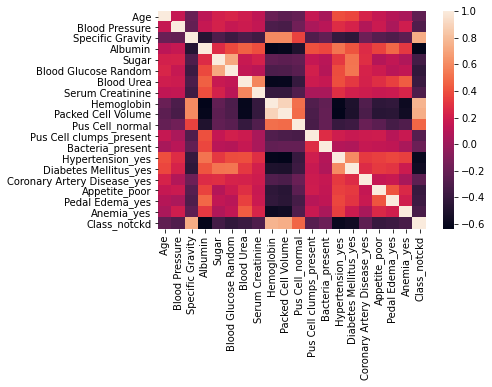

In [11]:
corr=data4.corr()
hm=sns.heatmap(corr)
hm

In [12]:
a=corr.index.tolist()
b=corr['Class_notckd'].tolist()
c=[]
for k in range(len(a)):
    if abs(b[k])<=0.5:
        c.append(a[k])
print(c)

[' Age', 'Blood Pressure', 'Sugar', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Pus Cell_normal', 'Pus Cell clumps_present', 'Bacteria_present', 'Coronary Artery Disease_yes', 'Appetite_poor', 'Pedal Edema_yes', 'Anemia_yes']


In [13]:
data5=data4.drop(columns=c)
data5

,Specific Gravity,Albumin,Hemoglobin,Packed Cell Volume,Hypertension_yes,Diabetes Mellitus_yes,Class_notckd
0,1.020,1.0,15.4,44.0,1,1,0
1,1.020,4.0,11.3,38.0,0,0,0
2,1.010,2.0,9.6,31.0,0,1,0
3,1.005,4.0,11.2,32.0,1,0,0
4,1.010,2.0,11.6,35.0,0,0,0
...,...,...,...,...,...,...,...
395,1.020,0.0,15.7,47.0,0,0,1
396,1.025,0.0,16.5,54.0,0,0,1
397,1.020,0.0,15.8,49.0,0,0,1
398,1.025,0.0,14.2,51.0,0,0,1


In [14]:
a=data5.mean().tolist()
b=data5.columns.tolist()
f={}
for k in range(len(a)):
        f.update({b[k]: a[k]})
print(f)

{'Specific Gravity': 1.0174079320113256, 'Albumin': 1.0169491525423728, 'Hemoglobin': 12.526436781609195, 'Packed Cell Volume': 38.88449848024316, 'Hypertension_yes': 0.3675, 'Diabetes Mellitus_yes': 0.3425, 'Class_notckd': 0.375}


In [15]:
data6 = data5.fillna(value=f)


# Fonction preprocessing

In [16]:
def preprocessing(data):
    a=data.isna().mean().tolist()
    b=data.columns.tolist()
    c=[]
    for k in range(len(a)):
        if a[k] >= 0.2 :
            c.append(b[k])
    data2=data.drop(columns=c)
    data3=data2.drop(columns='Id')

    catego=data3.select_dtypes(include='object').astype('category')
    catego=pandas.get_dummies(catego, drop_first=True)
         
    data3=data3.select_dtypes(exclude='object')
    data4=data3.join(catego)
    corr=data4.corr()           
    d=corr.index.tolist()
    e=corr['Class_notckd'].tolist()
    f=[]
    for k in range(len(d)):
        if abs(e[k])<=0.5:
            f.append(d[k])
    data5=data4.drop(columns=f)

    g=data5.mean().tolist()
    h=data5.columns.tolist()
    i={}
    for k in range(len(h)):
            i.update({h[k]: g[k]})
    data6 = data5.fillna(value=i)
    return(data6)


In [17]:
preprocessing(data)

,Specific Gravity,Albumin,Hemoglobin,Packed Cell Volume,Hypertension_yes,Diabetes Mellitus_yes,Class_notckd
0,1.020,1.0,15.4,44.0,1,1,0
1,1.020,4.0,11.3,38.0,0,0,0
2,1.010,2.0,9.6,31.0,0,1,0
3,1.005,4.0,11.2,32.0,1,0,0
4,1.010,2.0,11.6,35.0,0,0,0
...,...,...,...,...,...,...,...
395,1.020,0.0,15.7,47.0,0,0,1
396,1.025,0.0,16.5,54.0,0,0,1
397,1.020,0.0,15.8,49.0,0,0,1
398,1.025,0.0,14.2,51.0,0,0,1


# ML ALGORITHM 

In [18]:
X= data6.drop(columns='Class_notckd')
Y= data6['Class_notckd']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.model_selection import GridSearchCV
param_svc ={\
           'C':[ 1, 10, 50, 100],\
           'kernel':['linear',  'rbf'],\
            'gamma':['scale', 'auto'],\
           }

param_dt ={\
           'min_samples_split':[2,3,5,10,20],\
           'max_depth':[1, 5, 10, 20, 100],\
           }
param_knn ={\
             'algorithm': ['auto'],
             'metric': ['manhattan'],
             'n_neighbors': [3, 5, 7,8,9],
             'weights': ['uniform', 'distance']\
            }

# SVM

In [22]:
from sklearn.svm import SVC
classifier = SVC()
grid = GridSearchCV(classifier, param_grid=param_svc,
                    cv=50)

grid_results = grid.fit(X,Y)

print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Best: 0.9725, using {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [23]:
SVM = SVC(**grid_results.best_params_)
SVM.fit(X_train,y_train)


SVC(C=10, kernel='linear')

In [24]:
y_pred_svm = SVM.predict(X_test)

In [25]:
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[70  4]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        74
           1       0.92      0.98      0.95        46

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
grid = GridSearchCV(classifier, param_grid=param_knn,
                    cv=50)

grid_results = grid.fit(X, Y)

print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Best: 0.955, using {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [27]:
KNN = KNeighborsClassifier(**grid_results.best_params_)
KNN.fit(X_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [28]:
y_pred_knn = KNN.predict(X_test)


In [29]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[72  2]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        74
           1       0.96      0.98      0.97        46

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
grid = GridSearchCV(classifier, param_grid=param_dt,
                    cv=50)

grid_results = grid.fit(X, Y)

print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Best: 0.9875, using {'max_depth': 100, 'min_samples_split': 3}


In [31]:
Decision_tree = DecisionTreeClassifier(**grid_results.best_params_)
Decision_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=100, min_samples_split=3)

In [32]:
y_pred = Decision_tree.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72  2]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.96      1.00      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



#  Production model

In [34]:
production_model=DecisionTreeClassifier(max_depth=100, min_samples_split=3)